In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
train = pd.read_json("train.json")

### Preprocessing

In [3]:
train["num_photos"] = train["photos"].apply(len)
train["num_features"] = train["features"].apply(len)
train["num_description_words"] = train["description"].apply(lambda x: len(x.split(" ")))
train["created"] = pd.to_datetime(train["created"])
train["created_day"] = train["created"].dt.day
train["created_hour"] = train['created'].dt.hour
train['no_fee'] = [1 if ("No Fee" in x) else(0) for x in train.features]

In [4]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['manager_id'].values))

train['manager_id'] = lbl.transform(list(train['manager_id'].values))

temp = pd.concat([train.manager_id,pd.get_dummies(train.interest_level)], axis = 1).groupby('manager_id').mean()
temp.columns = ['high_frac','low_frac', 'medium_frac']
temp['count'] = train.groupby('manager_id').count().iloc[:,1]
temp['manager_skill'] = temp['medium_frac'] + 2 * temp['high_frac'] + 1.5 * temp['high_frac']*temp['medium_frac']
# get ixes for unranked managers...
unranked_managers_ixes = temp['count']<20
# ... and ranked ones
ranked_managers_ixes = ~unranked_managers_ixes
mean_values = temp.loc[ranked_managers_ixes, ['high_frac','low_frac', 'medium_frac','manager_skill']].mean()
temp.loc[unranked_managers_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
train = train.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')

#### Write CSV to Send to R

In [10]:
train.columns

Index([            u'bathrooms',              u'bedrooms',
                 u'building_id',               u'created',
                 u'description',       u'display_address',
                    u'features',        u'interest_level',
                    u'latitude',            u'listing_id',
                   u'longitude',            u'manager_id',
                      u'photos',                 u'price',
              u'street_address',            u'num_photos',
                u'num_features', u'num_description_words',
                 u'created_day',          u'created_hour',
                      u'no_fee',             u'high_frac',
                    u'low_frac',           u'medium_frac',
                       u'count',         u'manager_skill'],
      dtype='object')

In [11]:
train_out = train.loc[:, ['bathrooms', 'bedrooms', 'building_id', 'description', 'display_address', 'features',
                          'interest_level', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 
                          'price', 'street_address', 'num_photos', 'num_features', 'num_description_words',
                          'created_day', 'created_hour', 'no_fee', 'count', 'manager_skill']]
train_out.head()

,bathrooms,bedrooms,building_id,description,display_address,features,interest_level,latitude,listing_id,longitude,...,price,street_address,num_photos,num_features,num_description_words,created_day,created_hour,no_fee,count,manager_skill
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,...,3000,792 Metropolitan Avenue,5,0,95,24,7,0,90,0.255556
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,...,5465,808 Columbus Avenue,11,5,9,12,12,0,86,0.011628
2,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,...,2850,241 W 13 Street,8,4,94,17,3,0,134,0.517821
3,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,...,3275,333 East 49th Street,3,2,80,18,2,1,191,0.274609
4,1.0,4,0,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,...,3350,500 West 143rd Street,3,1,68,28,1,0,15,0.449945


#### Turning Features into Features

In [96]:
import re

In [97]:
train_try = train[0:100]

In [102]:
for x 

509    396 East 25th Street 
510           601 W.141st St
511           315 W 77th St.
512         571 W 139 Street
513          302 E 90 Street
514               2 Gold St.
515             560 W 43 St.
516         600 W 138 Street
517         1735 York Avenue
518     200 East 72nd Street
519          65 Macon Street
520     3030 Middletown Road
521            435 E 79th St
522    313 East 119th Street
523     240 East 27th Street
524          146 E 35 Street
525     435 East 79th Street
526      540 East 5th Street
527     14 West 103rd Street
528    396 East 25th Street 
529          64 Buffalo Ave.
530       1007 Second Avenue
531         22 Covert Street
532             303 10th Ave
533         9 Stanton Street
534     108 East 38th Street
535      63 Hamilton Terrace
536                50 W 93rd
537     165 Manhattan Avenue
538           170 E 90th St.
               ...          
814     360 West 34th Street
815           650 W 42nd St.
816    396 East 25th Street 
817     90 Was

#### preprocessing

In [4]:
from sklearn import preprocessing

train['price'] = preprocessing.scale(train['price'])
train["num_photos"] = preprocessing.scale(train["photos"].apply(len))
train["num_features"] = preprocessing.scale(train["features"].apply(len))
train["num_description_words"] = preprocessing.scale(train["description"].apply(lambda x: len(x.split(" "))))
train["created"] = pd.to_datetime(train["created"])
train["created_day"] = preprocessing.scale((train["created"].dt.day))
train["created_hour"] = preprocessing.scale(train['created'].dt.hour)

/home/andrew/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [5]:
X = train.loc[:, train.columns != 'interest_level']
y = train["interest_level"]

In [6]:
import seaborn as sns

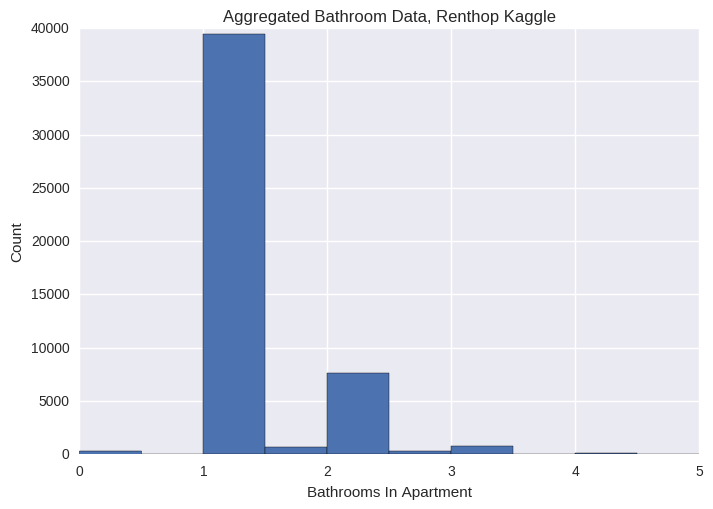

In [17]:
g = plt.hist(train['bathrooms'], bins = 20, label='men')
plt.title("Aggregated Bathroom Data, Renthop Kaggle")
plt.xlabel('Bathrooms In Apartment')
plt.ylabel('Count')
plt.xlim(0,5)
plt.show()
plt.savefig('bathrooms.png', bbox_inches='tight')

In [ ]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['manager_id'].values))

train['manager_id'] = lbl.transform(list(train['manager_id'].values))

temp = pd.concat([train.manager_id,pd.get_dummies(train.interest_level)], axis = 1).groupby('manager_id').mean()
temp.columns = ['high_frac','low_frac', 'medium_frac']
temp['count'] = train.groupby('manager_id').count().iloc[:,1]
temp['manager_skill'] = temp['medium_frac'] + 2 * temp['high_frac'] + 1.5 * temp['high_frac']*temp['medium_frac']
# get ixes for unranked managers...
unranked_managers_ixes = temp['count']<20
# ... and ranked ones
ranked_managers_ixes = ~unranked_managers_ixes
mean_values = temp.loc[ranked_managers_ixes, ['high_frac','low_frac', 'medium_frac','manager_skill']].mean()
temp.loc[unranked_managers_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
train = train.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')

In [ ]:
num_feats = ["bedrooms", "latitude", "longitude", "price", "no_fee", 
             "num_photos", "num_features", 'created_hour', 'manager_skill']

num_feats2 = ["bedrooms", "latitude", "longitude", "price", "no_fee", 'num_description_words',
             "num_photos", "num_features", 'created_hour', 'manager_skill']

num_feats3 = ["bedrooms", "latitude", "longitude", "price", "no_fee", "count", 
             "num_photos", "num_features", 'created_hour', 'manager_skill']

num_feats4 = ["bedrooms", "latitude", "longitude", "price", "no_fee", "count", 'num_description_words',
             "num_photos", "num_features", 'created_hour', 'manager_skill']

num_feats5 = ["bedrooms", "latitude", "longitude", "price", "num_photos", "num_features",
              'created_hour', 'num_description_words', 'created_day', 'manager_skill']

In [ ]:
X_df = train[num_feats]
X_mat = X_df.as_matrix()
X_mat.shape

X_df2 = train[num_feats2]
X_mat2 = X_df2.as_matrix()

X_df3 = train[num_feats3]
X_mat3 = X_df3.as_matrix()

X_df4 = train[num_feats4]
X_mat4 = X_df4.as_matrix()

X_df5 = train[num_feats5]
X_mat5 = X_df5.as_matrix()
X_mat.shape

In [ ]:
Y_df = pd.DataFrame(y)
Y_df['interest'] = [0 if x=='low' else(1 if x=='medium' else(2)) for x in Y_df.interest_level]
Y_mat = Y_df.interest.as_matrix()
Y_mat.shape

### Random Forest Feature Selection

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import log_loss

rf_feat_select = ensemble.RandomForestClassifier(n_estimators = 800, n_jobs = 3)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_mat, Y_mat, test_size=0.25)
rf_feat_select.fit(X_train, y_train)
rf_feat_select.score(X_train, y_train)

In [ ]:
y_val_pred = rf_feat_select.predict_proba(X_val)
log_loss(y_val, y_val_pred)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_mat2, Y_mat, test_size=0.25)
rf_feat_select.fit(X_train, y_train)
rf_feat_select.score(X_train, y_train)

In [ ]:
y_val_pred = rf_feat_select.predict_proba(X_val)
log_loss(y_val, y_val_pred)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_mat3, Y_mat, test_size=0.25)
rf_feat_select.fit(X_train, y_train)
rf_feat_select.score(X_train, y_train)

In [ ]:
y_val_pred = rf_feat_select.predict_proba(X_val)
log_loss(y_val, y_val_pred)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_mat4, Y_mat, test_size=0.25)
rf_feat_select.fit(X_train, y_train)
rf_feat_select.score(X_train, y_train)

In [ ]:
y_val_pred = rf_feat_select.predict_proba(X_val)
log_loss(y_val, y_val_pred)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_mat5, Y_mat, test_size=0.25)
rf_feat_select.fit(X_train, y_train)
rf_feat_select.score(X_train, y_train)

In [ ]:
y_val_pred = rf_feat_select.predict_proba(X_val)
log_loss(y_val, y_val_pred)

In [ ]:
rf_feat_select.feature_importances_

In [ ]:
pd.Series(index = num_feats5, data = rf_feat_select.feature_importances_).sort_values().plot(kind = 'bar')

In [ ]:
from sklearn import ensemble
from sklearn.metrics import log_loss
rf_model = ensemble.RandomForestClassifier(n_estimators = 650, n_jobs = 3)
rf_model.fit(X_mat, Y_mat)

In [ ]:
import sklearn.grid_search as gs
grid_para_rf = [{'max_features':[4], 'min_samples_split': [13,15,17], 'min_samples_leaf': [1,2], 
                'criterion': ['gini', 'entropy']}]

In [ ]:
grid_search_rf = gs.GridSearchCV(rf_feat_select, grid_para_rf, scoring = 'accuracy', cv=3)

In [ ]:
grid_search_rf.fit(X_mat, Y_mat)

In [ ]:
grid_search_rf.best_estimator_

In [ ]:
grid_search_rf.best_params_

In [ ]:
grid_search_rf.best_score_

In [ ]:
grid_search_rf.grid_scores_

In [ ]:
rf_gs_model = ensemble.RandomForestClassifier(n_estimators = 1000, n_jobs = 2, criterion = 'entropy', \
                                               min_samples_split = 15, max_features = 4)

In [ ]:

rf_gs_model.fit(X_mat, Y_mat)

In [ ]:
rf_gs_model.score(X_mat, Y_mat)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_mat, Y_mat, test_size=0.25)

In [ ]:
rf_gs_model.fit(X_train, y_train)

In [ ]:
y_val_pred = rf_gs_model.predict_proba(X_val)

In [ ]:
log_loss(y_val, y_val_pred)

#### look for optimal samples to split by...

In [ ]:
samples_tester = []

for x in range(1, 6, 1):
    if x % 2 == 0:
        print("Checking model with %d leafmin") % (x)
    clf = ensemble.RandomForestClassifier(n_estimators=625, n_jobs=3, min_samples_split = 10, min_samples_leaf = x, oob_score=True)
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict_proba(X_val)
    ll = log_loss(y_val, y_val_pred)
    samples_tester.append([x, ll, clf.oob_score_])

In [ ]:
tree = []
logloss = []
oob = []
for x in samples_tester:
    tree.append(x[0])
    logloss.append(x[1])
    oob.append(x[2])

In [ ]:
plt.scatter(tree, logloss)
plt.plot(tree, logloss)
plt.ylabel('logloss')
plt.xlabel('min sample split')
plt.title('logloss vs min sample split')
plt.show()

In [ ]:
plt.scatter(tree, oob)
plt.plot(tree, oob)
plt.ylabel('oob score')
plt.xlabel('min sample split')
plt.title('oob vs min sample split')
plt.show()

#### Search for optimal # of trees

In [ ]:
LL_tree = []

In [ ]:
for x in range(300, 1001, 100):
    if x % 200 == 0:
        print("Checking model with %d ests") % (x)
    clf = ensemble.RandomForestClassifier(n_estimators=x, n_jobs=3, oob_score=True)
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict_proba(X_val)
    ll = log_loss(y_val, y_val_pred)
    LL_tree.append([x, ll, clf.oob_score_])

In [ ]:
tree = []
logloss = []
oob = []
for x in LL_tree:
    tree.append(x[0])
    logloss.append(x[1])
    oob.append(x[2])

In [ ]:
plt.scatter(tree, logloss)
plt.plot(tree, logloss)
plt.ylabel('logloss')
plt.xlabel('tree count')
plt.title('logloss vs # of trees')
plt.show()

In [ ]:
plt.scatter(tree, oob)
plt.plot(tree, oob)
plt.ylabel('oob score')
plt.xlabel('tree count')
plt.title('oob vs # of trees')
plt.show()

#### Adapt Predictions

In [ ]:
test = pd.read_json(open("test.json", "r"))
print(test.shape)

In [ ]:
test["num_photos"] = test["photos"].apply(len)
test["num_features"] = test["features"].apply(len)
test["num_description_words"] = test["description"].apply(lambda x: len(x.split(" ")))
test["created"] = pd.to_datetime(test["created"])
test["created_year"] = test["created"].dt.year
test["created_month"] = test["created"].dt.month
test["created_day"] = test["created"].dt.day
test["created_hour"] = test['created'].dt.hour

In [ ]:
test['no_fee'] = [1 if ("No Fee" in x) else(0) for x in test.features]

In [ ]:
# add the features computed on the training dataset to the validation dataset
test = test.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
new_manager_ixes = test['high_frac'].isnull()
test.loc[new_manager_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
test.columns

In [ ]:
add_count = test.groupby('manager_id').count().iloc[:,1]
add_count = pd.DataFrame(add_count)
add_count['count'] = add_count.bedrooms
del add_count['bedrooms']

In [ ]:
test = test.merge(add_count,how='left', left_on='manager_id', right_index=True)

In [ ]:
testclf = ensemble.RandomForestClassifier(n_estimators=2000, n_jobs = 3, min_samples_split = 15, max_features = 4, 
                                         criterion = 'entropy')

In [ ]:
testclf.fit(X_mat, Y_mat)

In [ ]:
X = test[num_feats]
y = testclf.predict_proba(X)

In [ ]:
labels2idx = {'low': 0, 'medium': 1, 'high': 2}
labels2idx

In [ ]:
sub = pd.DataFrame()
sub["listing_id"] = test["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = y[:, labels2idx[label]]
sub.to_csv("submission_rf.csv", index=False)